In [8]:
# Import libraries and dependencies
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from MCForecastTools import MCSimulation

In [9]:
# Running a Monte Carlo simulation to forecast 15 years cumulative returns

data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = ["BCH-USD", "ETH-USD"],

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "7y",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  2 of 2 completed


In [10]:
data.index = pd.to_datetime(data.index)
data.head()

BCH-USD                         ETH-USD                      \
              Open High Low Close Volume      Open      High       Low   
Date                                                                     
2015-08-07     NaN  NaN NaN   NaN    NaN  2.831620  3.536610  2.521120   
2015-08-08     NaN  NaN NaN   NaN    NaN  2.793760  2.798810  0.714725   
2015-08-09     NaN  NaN NaN   NaN    NaN  0.706136  0.879810  0.629191   
2015-08-10     NaN  NaN NaN   NaN    NaN  0.713989  0.729854  0.636546   
2015-08-11     NaN  NaN NaN   NaN    NaN  0.708087  1.131410  0.663235   

                               
               Close   Volume  
Date                           
2015-08-07  2.772120   164329  
2015-08-08  0.753325   674188  
2015-08-09  0.701897   532170  
2015-08-10  0.708448   405283  
2015-08-11  1.067860  1463100

In [11]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
data=data.dropna()
MC_even_dist = MCSimulation(
    portfolio_data = data,
    weights = [1,0],
    num_simulation = 1000,
    num_trading_days = 252*10
)
MC_even_dist.portfolio_data.head()

BCH-USD                                                 \
                  Open        High         Low       Close     Volume   
Date                                                                    
2017-07-23  555.885986  578.971008  411.776001  413.059998    85013.0   
2017-07-24  412.579987  578.892029  409.210999  440.700989   190952.0   
2017-07-25  441.345001  541.658020  338.091003  406.897003   524908.0   
2017-07-26  407.082001  486.158997  321.791992  365.816010  1784640.0   
2017-07-27  417.097992  460.968994  367.777008  385.479004   533207.0   

                            ETH-USD                                      \
           daily_return        Open        High         Low       Close   
Date                                                                      
2017-07-23          NaN  229.123001  231.679993  217.722000  225.951004   
2017-07-24     0.066918  226.285004  227.537994  222.453003  224.710999   
2017-07-25    -0.076705  224.373001  225.324005  195.845001  206.710007   
2017-07-26    -0.100962  207.085999  210.766998  194.783997  203.953003   
2017-07-27     0.053751  204.856003  206.444000  201.259995  204.317993   

                                     
                Volume daily_return  
Date                                 
2017-07-23   649614976          NaN  
2017-07-24   431691008    -0.005488  
2017-07-25  1095760000    -0.080107  
2017-07-26   717692032    -0.013338  
2017-07-27   393283008     0.001790

In [12]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.163571,1.087417,1.117053,1.046255,0.964992,0.915439,0.886437,1.032410,0.987122,0.972922,...,1.032059,1.033179,1.044573,1.144625,1.011279,0.949977,1.011658,1.097592,0.910804,0.991093
2,1.232039,1.123898,1.206382,1.035606,0.934305,0.906625,0.927544,0.955378,0.903879,0.861042,...,1.036382,1.055510,1.045473,1.017626,1.081669,0.823455,1.034630,1.082044,0.817282,1.007585
3,1.205900,1.218795,1.199562,1.062155,0.887837,0.982826,0.876871,0.904439,0.878269,0.964680,...,1.039298,1.055492,1.175375,0.954822,1.132352,0.796067,1.027926,1.229415,0.752208,0.903101
4,1.306144,1.261605,1.131233,0.906905,1.071498,0.997469,0.938434,0.886197,0.929328,0.947872,...,1.003920,1.081812,1.217317,1.045358,1.309505,0.825964,1.076576,1.340856,0.770726,0.917513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.014121,5.033640,0.253475,0.005232,0.000465,0.901755,0.004435,0.039809,2.120172,2.432469,...,0.607491,2.943462,0.372671,14.252923,0.009874,35.507515,0.045132,0.084031,15.744719,0.665155
2517,0.013482,5.114965,0.247029,0.005067,0.000489,0.909513,0.004824,0.034572,2.073621,2.153182,...,0.561120,3.041477,0.369821,13.582374,0.008925,37.237834,0.048232,0.100480,14.222214,0.722612
2518,0.011761,5.006342,0.243441,0.005367,0.000489,0.759304,0.005104,0.038129,2.308707,2.117065,...,0.590551,2.576477,0.414167,14.087729,0.008782,37.298887,0.044575,0.120343,14.945169,0.664049
2519,0.012404,5.327799,0.230335,0.004963,0.000484,0.844734,0.005440,0.039176,2.540332,2.129938,...,0.598428,2.769056,0.409663,15.527862,0.008885,38.478450,0.033541,0.106329,15.658493,0.688781


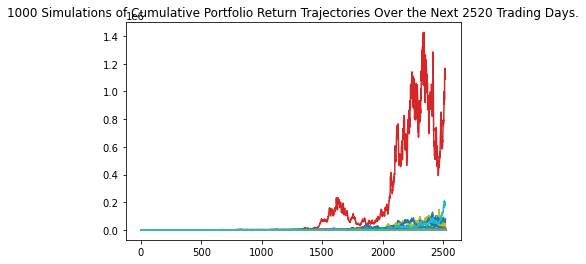

In [13]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

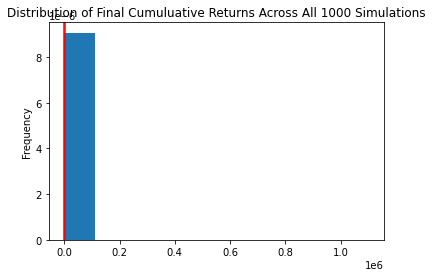

In [14]:
# Plot probability distribution and confidence intervals
att_dist_plot = MC_even_dist.plot_distribution()

In [15]:
# Fetch summary statistics from the Monte Carlo simulation results
att_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(att_tbl)

count           1.000000e+03
mean            1.806362e+03
std             3.557039e+04
min             9.310297e-06
25%             1.012470e-01
50%             1.380938e+00
75%             1.945154e+01
max             1.101331e+06
95% CI Lower    5.068504e-04
95% CI Upper    2.121018e+03
Name: 2520, dtype: float64


In [16]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
att_ci_lower = round(att_tbl[8]*15000,2)
att_ci_upper = round(att_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 10 years will end within in the range of $7.6 and $31815276.85.


In [17]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
data=data.dropna()
MC_even_dist = MCSimulation(
    portfolio_data = data,
    weights = [1,0],
    num_simulation = 1000,
    num_trading_days = 252*5
)
MC_even_dist.portfolio_data.head()

BCH-USD                                                 \
                  Open        High         Low       Close     Volume   
Date                                                                    
2017-07-23  555.885986  578.971008  411.776001  413.059998    85013.0   
2017-07-24  412.579987  578.892029  409.210999  440.700989   190952.0   
2017-07-25  441.345001  541.658020  338.091003  406.897003   524908.0   
2017-07-26  407.082001  486.158997  321.791992  365.816010  1784640.0   
2017-07-27  417.097992  460.968994  367.777008  385.479004   533207.0   

                            ETH-USD                                      \
           daily_return        Open        High         Low       Close   
Date                                                                      
2017-07-23          NaN  229.123001  231.679993  217.722000  225.951004   
2017-07-24     0.066918  226.285004  227.537994  222.453003  224.710999   
2017-07-25    -0.076705  224.373001  225.324005  195.845001  206.710007   
2017-07-26    -0.100962  207.085999  210.766998  194.783997  203.953003   
2017-07-27     0.053751  204.856003  206.444000  201.259995  204.317993   

                                     
                Volume daily_return  
Date                                 
2017-07-23   649614976          NaN  
2017-07-24   431691008    -0.005488  
2017-07-25  1095760000    -0.080107  
2017-07-26   717692032    -0.013338  
2017-07-27   393283008     0.001790

In [18]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011828,1.039144,1.025786,0.986066,0.976131,0.989911,0.964060,1.011863,1.088429,1.142618,...,1.080697,1.009631,1.055759,1.023179,0.908932,0.936236,0.971993,0.999139,0.918148,1.053009
2,1.026569,1.066529,0.962792,1.087747,0.869359,0.981051,1.012621,0.994128,1.167982,1.237266,...,1.101260,1.003316,1.089349,0.917812,0.889744,0.890051,1.017749,0.885440,0.928643,1.018950
3,1.025081,1.028307,0.926762,1.151549,0.916458,0.968615,1.048906,1.129906,1.324771,1.307957,...,1.070390,1.031197,1.056396,0.937932,0.965490,0.850311,1.098028,0.890252,0.817733,1.029873
4,1.058812,1.066855,0.920984,1.198952,0.942422,0.929771,1.075233,1.205261,1.518078,1.033872,...,1.067836,1.056225,1.008693,0.893743,0.935545,0.874991,1.269950,0.865490,0.751944,1.069090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.126418,4.064449,6.451922,0.018627,25.991942,0.234132,0.047174,0.501834,11.588567,0.067361,...,8.569970,0.015672,0.529748,77.631672,0.041676,0.404769,79.770462,0.050205,0.590890,5.778471
1257,0.131082,4.575347,5.981225,0.016764,25.263368,0.223128,0.052746,0.468748,11.628333,0.069366,...,8.232450,0.013381,0.483385,70.599824,0.039656,0.436865,81.328862,0.049316,0.584528,5.204885
1258,0.135843,4.784928,5.913855,0.018111,21.152477,0.195505,0.047555,0.408893,12.144648,0.061124,...,8.975463,0.012651,0.488890,74.705832,0.041044,0.430909,89.020615,0.052963,0.542861,5.409888
1259,0.146832,5.136293,6.401207,0.022314,19.684956,0.191731,0.048447,0.416712,12.320950,0.057120,...,8.567727,0.012513,0.449034,76.995110,0.040111,0.433464,94.942345,0.047208,0.565793,5.304846


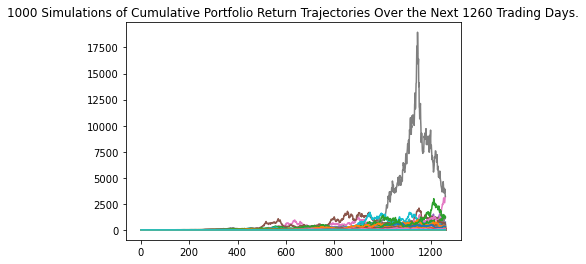

In [19]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

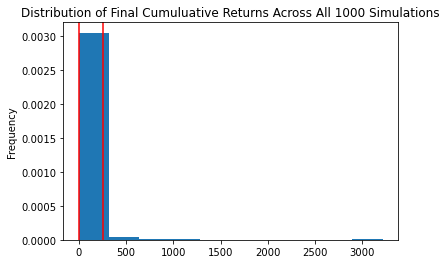

In [20]:
# Plot probability distribution and confidence intervals
att_dist_plot = MC_even_dist.plot_distribution()

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
att_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(att_tbl)

count           1000.000000
mean              29.319843
std              170.162453
min                0.000234
25%                0.145905
50%                0.984883
75%                7.149098
max             3215.956498
95% CI Lower       0.004673
95% CI Upper     262.584348
Name: 1260, dtype: float64


In [22]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
att_ci_lower = round(att_tbl[8]*15000,5)
att_ci_upper = round(att_tbl[9]*15000,5)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $70.09978 and $3938765.22502.


In [23]:
# Running a Monte Carlo simulation to forecast 15 years cumulative returns
data=data.dropna()
MC_even_dist = MCSimulation(
    portfolio_data = data,
    weights = [1,0],
    num_simulation = 1000,
    num_trading_days = 252*15
)
MC_even_dist.portfolio_data.head()

BCH-USD                                                 \
                  Open        High         Low       Close     Volume   
Date                                                                    
2017-07-23  555.885986  578.971008  411.776001  413.059998    85013.0   
2017-07-24  412.579987  578.892029  409.210999  440.700989   190952.0   
2017-07-25  441.345001  541.658020  338.091003  406.897003   524908.0   
2017-07-26  407.082001  486.158997  321.791992  365.816010  1784640.0   
2017-07-27  417.097992  460.968994  367.777008  385.479004   533207.0   

                            ETH-USD                                      \
           daily_return        Open        High         Low       Close   
Date                                                                      
2017-07-23          NaN  229.123001  231.679993  217.722000  225.951004   
2017-07-24     0.066918  226.285004  227.537994  222.453003  224.710999   
2017-07-25    -0.076705  224.373001  225.324005  195.845001  206.710007   
2017-07-26    -0.100962  207.085999  210.766998  194.783997  203.953003   
2017-07-27     0.053751  204.856003  206.444000  201.259995  204.317993   

                                     
                Volume daily_return  
Date                                 
2017-07-23   649614976          NaN  
2017-07-24   431691008    -0.005488  
2017-07-25  1095760000    -0.080107  
2017-07-26   717692032    -0.013338  
2017-07-27   393283008     0.001790

In [24]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.963260,1.125655,0.988837,1.087882,1.046754,0.985643,0.997385,1.063110,1.088279,1.057009,...,0.983962,0.949299,1.085348,1.011712,1.091392,1.076809,0.921243,0.981564,0.897146,1.077556
2,1.023465,1.093692,0.877403,1.008229,0.907920,1.042822,0.741688,1.089392,0.899796,1.148067,...,1.124535,0.895814,0.999071,0.912699,1.008451,1.170892,0.940817,1.078341,0.844219,1.109917
3,0.992109,1.200061,0.811572,1.118599,0.994775,1.141292,0.637140,1.030697,0.970375,1.122393,...,1.165511,0.941221,0.858748,0.965161,1.073082,1.123013,0.884073,1.031940,0.833735,1.317190
4,1.036155,1.135576,0.856874,1.038613,1.046877,1.124162,0.641293,1.118834,1.075850,1.193797,...,1.076791,0.865266,0.818847,1.025182,1.216329,0.971526,0.859296,1.102464,0.835086,1.178632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,22.482398,0.148166,0.145720,0.000200,0.006665,7.926877,13.513717,0.023002,0.490870,588404.259436,...,2.421340,9.141698,0.772428,0.000140,5.362380,0.003291,0.037317,0.055867,4.142186,0.355419
3777,20.498743,0.139778,0.157221,0.000191,0.006771,7.182134,14.205381,0.021882,0.461261,593273.839683,...,2.589321,10.549475,0.790449,0.000140,5.387123,0.003609,0.034565,0.050766,3.963406,0.361541
3778,21.425591,0.141869,0.153503,0.000204,0.006691,6.362095,15.937471,0.021279,0.441018,608301.674075,...,2.464507,10.338573,0.860000,0.000146,5.350845,0.004090,0.032700,0.054952,4.497057,0.368678
3779,18.111936,0.155746,0.150501,0.000218,0.006383,6.579314,17.954407,0.019556,0.411970,563000.426211,...,2.294234,10.538836,0.922736,0.000131,5.014532,0.004407,0.033388,0.048082,4.132719,0.389219


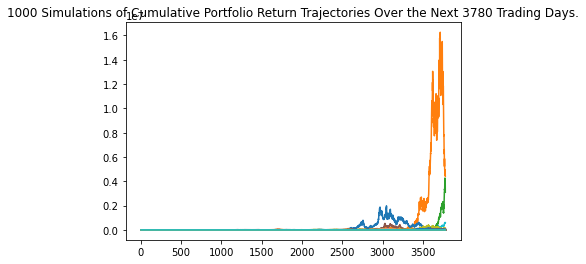

In [25]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

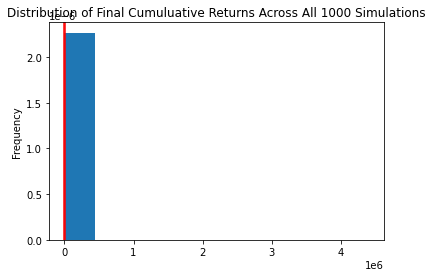

In [26]:
# Plot probability distribution and confidence intervals
att_dist_plot = MC_even_dist.plot_distribution()

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
att_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(att_tbl)

count           1.000000e+03
mean            9.219455e+03
std             1.712299e+05
min             1.479967e-08
25%             4.456850e-02
50%             1.226482e+00
75%             2.440767e+01
max             4.399447e+06
95% CI Lower    4.278907e-05
95% CI Upper    1.190644e+04
Name: 3780, dtype: float64


In [28]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
att_ci_lower = round(att_tbl[8]*15000,2)
att_ci_upper = round(att_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 15 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 15 years will end within in the range of $0.64 and $178596533.98.
